In [81]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import fiona
import shapely

In [82]:
df = pd.read_csv('../../data_evaluation/osm_places/osm_opening_hours.csv')

In [83]:
gdf = gpd.read_file('../../data_evaluation/taxi_trip_data/nyc_taxi_shapes/geo_export_6f0d55da-c90b-4320-bceb-63c1b6b0e22f.shp') 

In [84]:
gdf['location_i'] = gdf['location_i'].astype(int)

In [85]:
gdf

,borough,location_i,objectid,shape_area,shape_leng,zone,geometry
0,EWR,1,1.0,0.000782,0.116357,Newark Airport,"POLYGON ((-74.18445 40.69500, -74.18449 40.695..."
1,Queens,2,2.0,0.004866,0.433470,Jamaica Bay,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,Bronx,3,3.0,0.000314,0.084341,Allerton/Pelham Gardens,"POLYGON ((-73.84793 40.87134, -73.84725 40.870..."
3,Manhattan,4,4.0,0.000112,0.043567,Alphabet City,"POLYGON ((-73.97177 40.72582, -73.97179 40.725..."
4,Staten Island,5,5.0,0.000498,0.092146,Arden Heights,"POLYGON ((-74.17422 40.56257, -74.17349 40.562..."
...,...,...,...,...,...,...,...
258,Brooklyn,256,256.0,0.000169,0.067915,Williamsburg (South Side),"POLYGON ((-73.95834 40.71331, -73.95681 40.712..."
259,Bronx,259,259.0,0.000395,0.126750,Woodlawn/Wakefield,"POLYGON ((-73.85107 40.91037, -73.85207 40.909..."
260,Queens,260,260.0,0.000422,0.133514,Woodside,"POLYGON ((-73.90175 40.76078, -73.90147 40.759..."
261,Manhattan,261,261.0,0.000034,0.027120,World Trade Center,"POLYGON ((-74.01333 40.70503, -74.01327 40.704..."


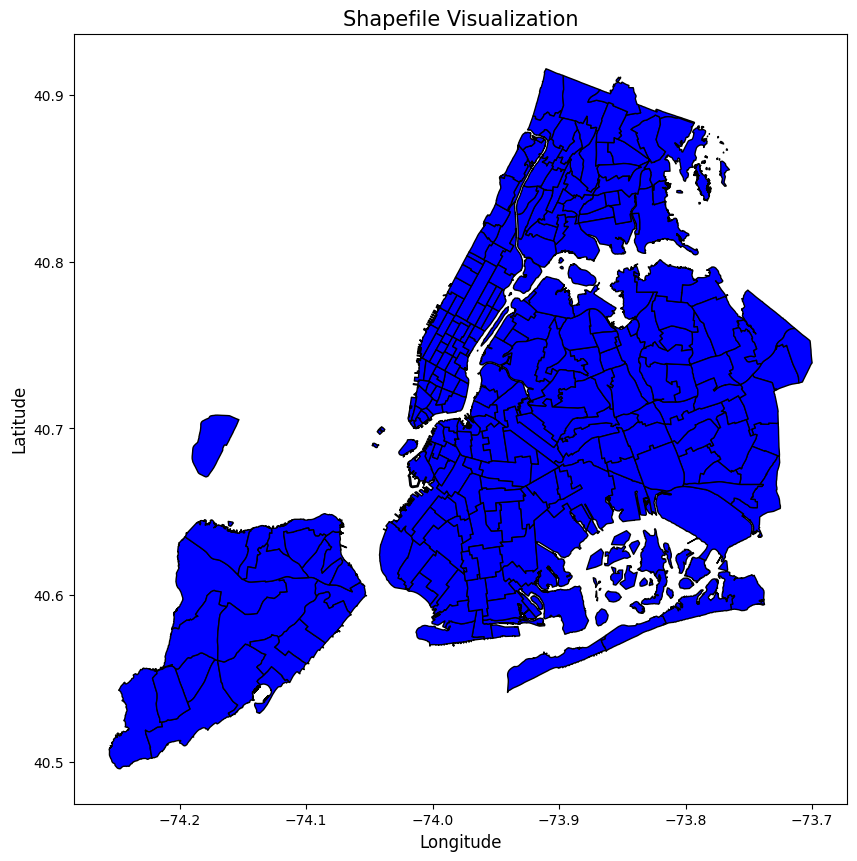

In [86]:
# Plot the geodataframe with customizations
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='blue', edgecolor='black')

# Add title and labels
ax.set_title("Shapefile Visualization", fontsize=15)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
plt.show()

In [87]:
# Drop any rows with no opening hours
df = df.loc[df['hours_parsed']!= '[]']
df.reset_index(drop=True, inplace=True)
# Location ID col, set to 0 first
df['location'] = 0

In [88]:
df

,id,lat,lon,hours_parsed,location
0,349323821,40.762515,-73.976690,"[{'day': 'monday', 'opens': '11:00', 'closes':...",0
1,357620442,40.741558,-73.978463,"[{'day': 'monday', 'opens': '12:00', 'closes':...",0
2,368045855,40.748038,-73.976099,"[{'day': 'monday', 'opens': '9:00', 'closes': ...",0
3,368047348,40.762222,-73.868889,"[{'day': 'monday', 'opens': '5:00', 'closes': ...",0
4,368049383,40.773741,-73.982941,"[{'day': 'monday', 'opens': '8:30', 'closes': ...",0
...,...,...,...,...,...
7358,11726831143,40.780623,-73.979910,"[{'day': 'tuesday', 'opens': '5:00', 'closes':...",0
7359,11739272854,40.587964,-73.955871,"[{'day': 'monday', 'opens': '9:00', 'closes': ...",0
7360,11835593507,40.713795,-73.991638,"[{'day': 'monday', 'opens': '6:00', 'closes': ...",0
7361,11851487120,40.746885,-73.859908,"[{'day': 'monday', 'opens': '6:00', 'closes': ...",0


In [89]:
geometries = []
for index, row in gdf.iterrows():
    geometries += [shapely.geometry.shape(row['geometry'])]

In [90]:
# gdf['geometry'] = geometries

In [91]:
gdf.dtypes

borough         object
location_i       int32
objectid       float64
shape_area     float64
shape_leng     float64
zone            object
geometry      geometry
dtype: object

In [93]:
for index, row in df.iterrows():
    point = shapely.geometry.Point(row['lon'], row['lat'])
    for _, gdf_row in gdf.iterrows():
        if gdf_row['geometry'].contains(point):
            df.loc[index, 'location'] = gdf_row['location_i']

In [96]:
df.drop(df[df['location']==0].index, inplace=True)